## Libraries

In [1]:
%%time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline
import keras
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import LeakyReLU
from emnist import extract_training_samples
from emnist import extract_test_samples
from keras.utils import np_utils
from matplotlib import pyplot
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import plot_model, to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import time
import os
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.optimizers import SGD

CPU times: user 3.1 s, sys: 4.75 s, total: 7.85 s
Wall time: 2.41 s


## Data Preparations, global parameters and optimisation tunings

In [2]:
#Global para's

img_width, img_height = 28, 28
leaky_relu_alpha = 0.1

In [3]:
X_train, y_train = extract_training_samples('balanced')
X_test, y_test = extract_test_samples('balanced')

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


'''
CNN's require a different formal of input data as compared to MLP;
this function reshapes the image data accordingly.

Reshapring for 3D cnn format since we are using black and white images, gotta made it 3dim.

'''

img_width, img_height = 28, 28

X_trainCNN, y_trainCNN = extract_training_samples('balanced')
X_testCNN, y_testCNN = extract_test_samples('balanced')

if K.image_data_format() == 'channels_first':
    X_trainCNN = X_trainCNN.reshape(X_trainCNN.shape[0], 1, img_width, img_height)
    X_testCNN = X_testCNN.reshape(X_testCNN.shape[0], 1, img_width, img_height)
    CNNinput_shape = (1, img_width, img_height)
else:
    X_trainCNN = X_trainCNN.reshape(X_trainCNN.shape[0], img_width, img_height, 1)
    X_testCNN = X_testCNN.reshape(X_testCNN.shape[0], img_width, img_height, 1)
    CNNinput_shape = (img_width, img_height, 1)
    
X_trainCNN = X_trainCNN / 255
X_testCNN = X_testCNN / 255
    
y_trainCNN = np_utils.to_categorical(y_trainCNN)
y_testCNN = np_utils.to_categorical(y_testCNN)

In [4]:
X_trainCNN[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Image Augmentation

In [5]:
'''
Image rotation of 40 degree's (minics difference angles of writing)
Shear, Vertical, Horizontal shifts by 0.08 (minic displacements and cursive fonts)
Zoom's in by 0.08 (minics alphabets size difference)

'''

img_gen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=40,
    #shear_range = 30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #zoom_range = [-0.5,0.5],
    horizontal_flip=False)

In [6]:
'''
An example of how the image augmentation function can affect our data.
'''

def gallery(array, ncols=3):
    nindex, height, width = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols)
    result = (array.reshape(nrows, ncols, height, width)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))
    return result


distorted = np.empty(shape = (0,28,28), dtype = "uint8")
i = 0
for batch in img_gen.flow(X_trainCNN[[4]]*255, batch_size=1,):
    i += 1
    pd
    distorted = np.append(distorted, batch.reshape((28,28)).astype("uint8"))
    if i > 20:
        break
distorted = distorted.reshape((21,28,28))



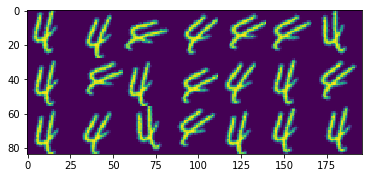

In [7]:
plt.imshow(gallery(distorted, ncols = 7))


## Baseline models for NN
- Baseline MLP (Simple one Hidden layer network)
- Baseline CNN (Simple one CNN layer)

In [8]:
def baseline_model():
     
    model = Sequential()
    
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    #adam = optimizers.Adam(lr = 0.001)
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

base_model = baseline_model()
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 47)                36895     
Total params: 652,335
Trainable params: 652,335
Non-trainable params: 0
_________________________________________________________________


In [9]:
%%time

#Non augmented Train

baseMLPHistory = base_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
base_scores = base_model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-base_scores[1]*100))
print(f'Test loss for base MLP: {base_scores[0]} / Test accuracy: {base_scores[1]}')


Epoch 1/30
564/564 - 2s - loss: 1.5892 - accuracy: 0.5815 - val_loss: 1.1812 - val_accuracy: 0.6759
Epoch 2/30
564/564 - 2s - loss: 1.0522 - accuracy: 0.7064 - val_loss: 0.9904 - val_accuracy: 0.7242
Epoch 3/30
564/564 - 2s - loss: 0.8929 - accuracy: 0.7464 - val_loss: 0.8835 - val_accuracy: 0.7498
Epoch 4/30
564/564 - 2s - loss: 0.7848 - accuracy: 0.7731 - val_loss: 0.7896 - val_accuracy: 0.7732
Epoch 5/30
564/564 - 2s - loss: 0.7076 - accuracy: 0.7924 - val_loss: 0.7272 - val_accuracy: 0.7882
Epoch 6/30
564/564 - 2s - loss: 0.6503 - accuracy: 0.8063 - val_loss: 0.6878 - val_accuracy: 0.7939
Epoch 7/30
564/564 - 2s - loss: 0.6048 - accuracy: 0.8182 - val_loss: 0.6491 - val_accuracy: 0.8034
Epoch 8/30
564/564 - 2s - loss: 0.5698 - accuracy: 0.8263 - val_loss: 0.6217 - val_accuracy: 0.8114
Epoch 9/30
564/564 - 2s - loss: 0.5404 - accuracy: 0.8342 - val_loss: 0.6064 - val_accuracy: 0.8138
Epoch 10/30
564/564 - 2s - loss: 0.5171 - accuracy: 0.8391 - val_loss: 0.5849 - val_accuracy: 0.8176

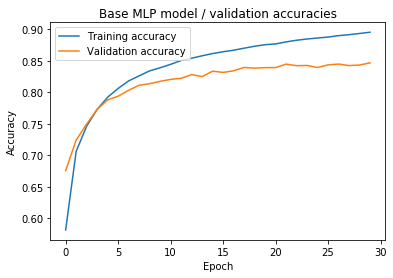

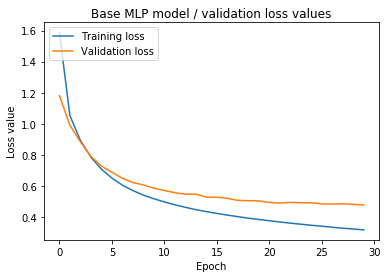

In [10]:
plt.plot(baseMLPHistory.history['accuracy'], label='Training accuracy')
plt.plot(baseMLPHistory.history['val_accuracy'], label='Validation accuracy')
plt.title('Base MLP model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(baseMLPHistory.history['loss'], label='Training loss')
plt.plot(baseMLPHistory.history['val_loss'], label='Validation loss')
plt.title('Base MLP model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()


In [11]:
def base_CNN():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=CNNinput_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [12]:
base_CNN_model = base_CNN()
base_CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 47)                6063      
Total params: 818,575
Trainable params: 818,575
Non-trainable params: 0
________________________________________________

In [13]:
%%time
baseCNNHistory = base_CNN_model.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=30, batch_size=200, verbose=2)
base_CNN_scores = base_CNN_model.evaluate(X_testCNN, y_testCNN, verbose=0)

print("Baseline Error: %.2f%%" % (100-base_CNN_scores[1]*100))
print(f'Test loss for base CNN: {base_CNN_scores[0]} / Test accuracy: {base_CNN_scores[1]}')

Epoch 1/30
564/564 - 27s - loss: 0.9708 - accuracy: 0.7118 - val_loss: 0.5878 - val_accuracy: 0.8108
Epoch 2/30
564/564 - 27s - loss: 0.4932 - accuracy: 0.8360 - val_loss: 0.4911 - val_accuracy: 0.8384
Epoch 3/30
564/564 - 26s - loss: 0.4201 - accuracy: 0.8560 - val_loss: 0.4752 - val_accuracy: 0.8430
Epoch 4/30
564/564 - 26s - loss: 0.3778 - accuracy: 0.8692 - val_loss: 0.4361 - val_accuracy: 0.8505
Epoch 5/30
564/564 - 26s - loss: 0.3482 - accuracy: 0.8774 - val_loss: 0.4416 - val_accuracy: 0.8520
Epoch 6/30
564/564 - 27s - loss: 0.3242 - accuracy: 0.8836 - val_loss: 0.4278 - val_accuracy: 0.8590
Epoch 7/30
564/564 - 26s - loss: 0.3047 - accuracy: 0.8894 - val_loss: 0.4163 - val_accuracy: 0.8585
Epoch 8/30
564/564 - 26s - loss: 0.2877 - accuracy: 0.8946 - val_loss: 0.4135 - val_accuracy: 0.8629
Epoch 9/30
564/564 - 27s - loss: 0.2710 - accuracy: 0.8994 - val_loss: 0.4166 - val_accuracy: 0.8613
Epoch 10/30
564/564 - 26s - loss: 0.2574 - accuracy: 0.9040 - val_loss: 0.4223 - val_accura

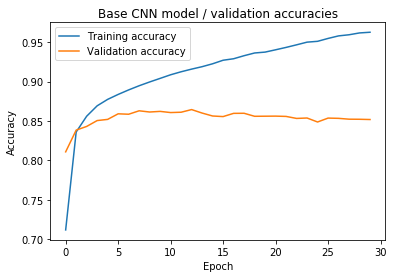

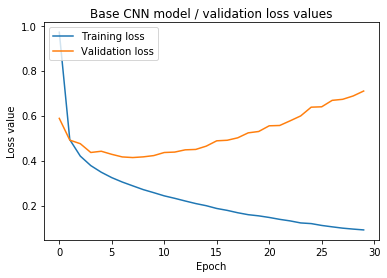

In [14]:
plt.plot(baseCNNHistory.history['accuracy'], label='Training accuracy')
plt.plot(baseCNNHistory.history['val_accuracy'], label='Validation accuracy')
plt.title('Base CNN model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(baseCNNHistory.history['loss'], label='Training loss')
plt.plot(baseCNNHistory.history['val_loss'], label='Validation loss')
plt.title('Base CNN model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [15]:
def conv_model():

    '''
    {784 - [32C3-32C3-32C5S2] - [64C3-64C3-64C5S2] - 128 - 47}
    '''
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size = 3, input_shape = CNNinput_shape))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())

    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))    
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, kernel_size = 3))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
        
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    

    model.add(Conv2D(128, kernel_size = 4))
    model.add(LeakyReLU(alpha=leaky_relu_alpha))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.4))
               
    model.add(Dense(num_classes, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [16]:
CNN_model = conv_model()
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)       

In [18]:

%%time
# No augmented Data

CNNHistory = CNN_model.fit(X_trainCNN, y_trainCNN, validation_data=(X_testCNN, y_testCNN), epochs=50, batch_size=200, verbose=2)
CNN_scores = CNN_model.evaluate(X_testCNN, y_testCNN, verbose=0)

print("Baseline Error: %.2f%%" % (100-CNN_scores[1]*100))
print(f'Test loss for base CNN: {CNN_scores[0]} / Test accuracy: {CNN_scores[1]}')

Epoch 1/50
564/564 - 55s - loss: 0.9997 - accuracy: 0.7070 - val_loss: 0.4776 - val_accuracy: 0.8382
Epoch 2/50
564/564 - 56s - loss: 0.4891 - accuracy: 0.8344 - val_loss: 0.3800 - val_accuracy: 0.8685
Epoch 3/50
564/564 - 56s - loss: 0.4256 - accuracy: 0.8524 - val_loss: 0.4038 - val_accuracy: 0.8614
Epoch 4/50
564/564 - 56s - loss: 0.3946 - accuracy: 0.8611 - val_loss: 0.3360 - val_accuracy: 0.8801
Epoch 5/50
564/564 - 55s - loss: 0.3737 - accuracy: 0.8671 - val_loss: 0.3430 - val_accuracy: 0.8790
Epoch 6/50
564/564 - 55s - loss: 0.3604 - accuracy: 0.8710 - val_loss: 0.3311 - val_accuracy: 0.8812
Epoch 7/50
564/564 - 55s - loss: 0.3488 - accuracy: 0.8749 - val_loss: 0.3197 - val_accuracy: 0.8879
Epoch 8/50
564/564 - 55s - loss: 0.3392 - accuracy: 0.8774 - val_loss: 0.3290 - val_accuracy: 0.8829
Epoch 9/50
564/564 - 55s - loss: 0.3315 - accuracy: 0.8796 - val_loss: 0.3073 - val_accuracy: 0.8914
Epoch 10/50
564/564 - 54s - loss: 0.3213 - accuracy: 0.8826 - val_loss: 0.3151 - val_accura

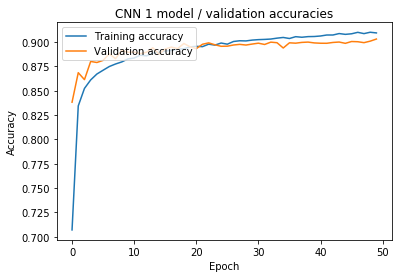

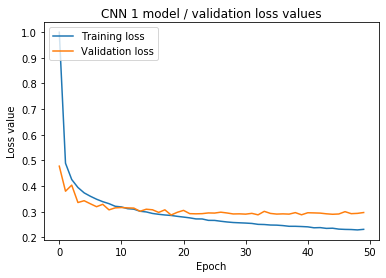

In [27]:
plt.plot(CNNHistory.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 1 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory.history['loss'], label='Training loss')
plt.plot(CNNHistory.history['val_loss'], label='Validation loss')
plt.title('CNN 1 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [20]:
%%time

#Aug train only

CNNHistory2 = CNN_model.fit(img_gen.flow(X_trainCNN,y_trainCNN), validation_data=(X_testCNN, y_testCNN), batch_size=200,epochs=50, verbose=2)
CNN_scores2 = CNN_model.evaluate(X_testCNN, y_testCNN, verbose=0)

print("Baseline Error: %.2f%%" % (100-CNN_scores2[1]*100))
print(f'Test loss for base CNN: {CNN_scores2[0]} / Test accuracy: {CNN_scores2[1]}')

Epoch 1/50
3525/3525 - 120s - loss: 0.7750 - accuracy: 0.7510 - val_loss: 0.3855 - val_accuracy: 0.8631
Epoch 2/50
3525/3525 - 108s - loss: 0.6264 - accuracy: 0.7905 - val_loss: 0.3814 - val_accuracy: 0.8640
Epoch 3/50
3525/3525 - 157s - loss: 0.5888 - accuracy: 0.8015 - val_loss: 0.3600 - val_accuracy: 0.8703
Epoch 4/50
3525/3525 - 142s - loss: 0.5610 - accuracy: 0.8099 - val_loss: 0.3577 - val_accuracy: 0.8759
Epoch 5/50
3525/3525 - 175s - loss: 0.5452 - accuracy: 0.8150 - val_loss: 0.3679 - val_accuracy: 0.8709
Epoch 6/50
3525/3525 - 224s - loss: 0.5364 - accuracy: 0.8180 - val_loss: 0.3848 - val_accuracy: 0.8654
Epoch 7/50
3525/3525 - 225s - loss: 0.5215 - accuracy: 0.8215 - val_loss: 0.3646 - val_accuracy: 0.8717
Epoch 8/50
3525/3525 - 188s - loss: 0.5139 - accuracy: 0.8243 - val_loss: 0.3737 - val_accuracy: 0.8699
Epoch 9/50
3525/3525 - 262s - loss: 0.5055 - accuracy: 0.8263 - val_loss: 0.3567 - val_accuracy: 0.8759
Epoch 10/50
3525/3525 - 256s - loss: 0.5000 - accuracy: 0.8288 -

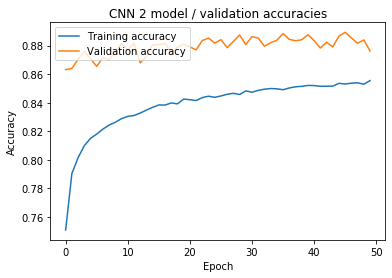

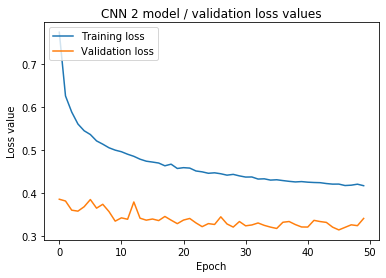

In [28]:
plt.plot(CNNHistory2.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory2.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 2 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory2.history['loss'], label='Training loss')
plt.plot(CNNHistory2.history['val_loss'], label='Validation loss')
plt.title('CNN 2 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [22]:
%%time

#Aug Train & Aug Test

CNNHistory3 = CNN_model.fit(img_gen.flow(X_trainCNN,y_trainCNN), validation_data=(X_testCNN, y_testCNN), batch_size=200,epochs=50, verbose=2)
CNN_scores3 = CNN_model.evaluate(img_gen.flow(X_testCNN, y_testCNN), verbose=0)

print("Baseline Error: %.2f%%" % (100-CNN_scores3[1]*100))
print(f'Test loss for base CNN: {CNN_scores3[0]} / Test accuracy: {CNN_scores3[1]}')

Epoch 1/50
3525/3525 - 287s - loss: 0.4150 - accuracy: 0.8546 - val_loss: 0.3157 - val_accuracy: 0.8873
Epoch 2/50
3525/3525 - 260s - loss: 0.4171 - accuracy: 0.8544 - val_loss: 0.3167 - val_accuracy: 0.8870
Epoch 3/50
3525/3525 - 297s - loss: 0.4147 - accuracy: 0.8561 - val_loss: 0.3228 - val_accuracy: 0.8832
Epoch 4/50
3525/3525 - 267s - loss: 0.4119 - accuracy: 0.8553 - val_loss: 0.3184 - val_accuracy: 0.8863
Epoch 5/50
3525/3525 - 259s - loss: 0.4128 - accuracy: 0.8563 - val_loss: 0.3151 - val_accuracy: 0.8860
Epoch 6/50
3525/3525 - 191s - loss: 0.4146 - accuracy: 0.8539 - val_loss: 0.3120 - val_accuracy: 0.8897
Epoch 7/50
3525/3525 - 213s - loss: 0.4094 - accuracy: 0.8554 - val_loss: 0.3215 - val_accuracy: 0.8828
Epoch 8/50
3525/3525 - 221s - loss: 0.4105 - accuracy: 0.8562 - val_loss: 0.3271 - val_accuracy: 0.8823
Epoch 9/50
3525/3525 - 221s - loss: 0.4108 - accuracy: 0.8557 - val_loss: 0.3203 - val_accuracy: 0.8861
Epoch 10/50
3525/3525 - 270s - loss: 0.4074 - accuracy: 0.8561 -

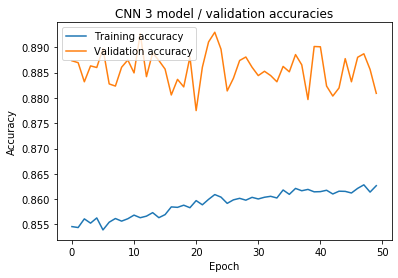

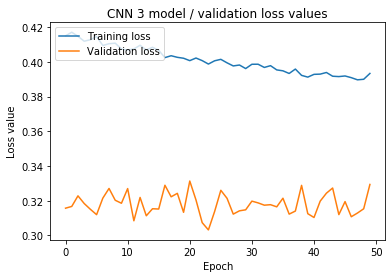

In [29]:
plt.plot(CNNHistory3.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory3.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 3 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory3.history['loss'], label='Training loss')
plt.plot(CNNHistory3.history['val_loss'], label='Validation loss')
plt.title('CNN 3 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [24]:
%%time

#Aug test only

CNNHistory4 = CNN_model.fit(X_trainCNN,y_trainCNN, validation_data=(X_testCNN, y_testCNN), batch_size=200,epochs=50, verbose=2)
CNN_scores4 = CNN_model.evaluate(img_gen.flow(X_testCNN, y_testCNN), verbose=0)

print("Baseline Error: %.2f%%" % (100-CNN_scores4[1]*100))
print(f'Test loss for base CNN: {CNN_scores4[0]} / Test accuracy: {CNN_scores4[1]}')

Epoch 1/50
564/564 - 87s - loss: 0.2879 - accuracy: 0.8929 - val_loss: 0.2782 - val_accuracy: 0.8998
Epoch 2/50
564/564 - 109s - loss: 0.2758 - accuracy: 0.8975 - val_loss: 0.2771 - val_accuracy: 0.8990
Epoch 3/50
564/564 - 112s - loss: 0.2716 - accuracy: 0.8989 - val_loss: 0.2712 - val_accuracy: 0.9010
Epoch 4/50
564/564 - 87s - loss: 0.2679 - accuracy: 0.8995 - val_loss: 0.2712 - val_accuracy: 0.9011
Epoch 5/50
564/564 - 87s - loss: 0.2642 - accuracy: 0.9004 - val_loss: 0.2684 - val_accuracy: 0.9020
Epoch 6/50
564/564 - 116s - loss: 0.2626 - accuracy: 0.9009 - val_loss: 0.2680 - val_accuracy: 0.9021
Epoch 7/50
564/564 - 103s - loss: 0.2589 - accuracy: 0.9022 - val_loss: 0.2691 - val_accuracy: 0.9037
Epoch 8/50
564/564 - 86s - loss: 0.2571 - accuracy: 0.9031 - val_loss: 0.2670 - val_accuracy: 0.9035
Epoch 9/50
564/564 - 95s - loss: 0.2548 - accuracy: 0.9035 - val_loss: 0.2688 - val_accuracy: 0.9027
Epoch 10/50
564/564 - 113s - loss: 0.2553 - accuracy: 0.9039 - val_loss: 0.2659 - val_a

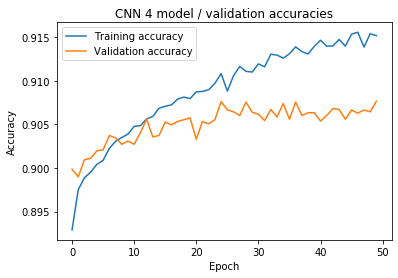

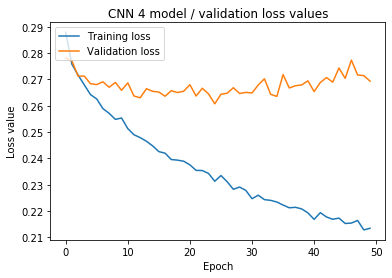

In [30]:
plt.plot(CNNHistory4.history['accuracy'], label='Training accuracy')
plt.plot(CNNHistory4.history['val_accuracy'], label='Validation accuracy')
plt.title('CNN 4 model / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(CNNHistory4.history['loss'], label='Training loss')
plt.plot(CNNHistory4.history['val_loss'], label='Validation loss')
plt.title('CNN 4 model / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()